In [1]:
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 16
Total threads: 128,Total memory: 0.98 TiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:37011,Workers: 16
Dashboard: http://127.0.0.1:8787/status,Total threads: 128
Started: Just now,Total memory: 0.98 TiB
Comm: tcp://127.0.0.1:34339,Total threads: 8
Dashboard: http://127.0.0.1:33127/status,Memory: 62.93 GiB
Nanny: tcp://127.0.0.1:39489,


In [3]:
## Read in ITER 0 Diagnostics 
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import xarray as xr
from xmitgcm import open_mdsdataset
import numpy as np
import warnings
# warnings.filterwarnings("ignore")

data_dir = '/data/SO3/edavenport/tpose6/sep2012/run_iter0/'
grid_dir = '/data/SO6/TPOSE_diags/tpose6/grid_6/'

num_diags = 122 #
itPerFile = 72 # 1 day
intervals = range(itPerFile,itPerFile*num_diags+1,itPerFile)

prefix = ['diag_state']
tpose_ds = open_mdsdataset(data_dir=data_dir,grid_dir=grid_dir,iters=intervals,prefix=prefix,ref_date='2012-09-01',delta_t=1200)


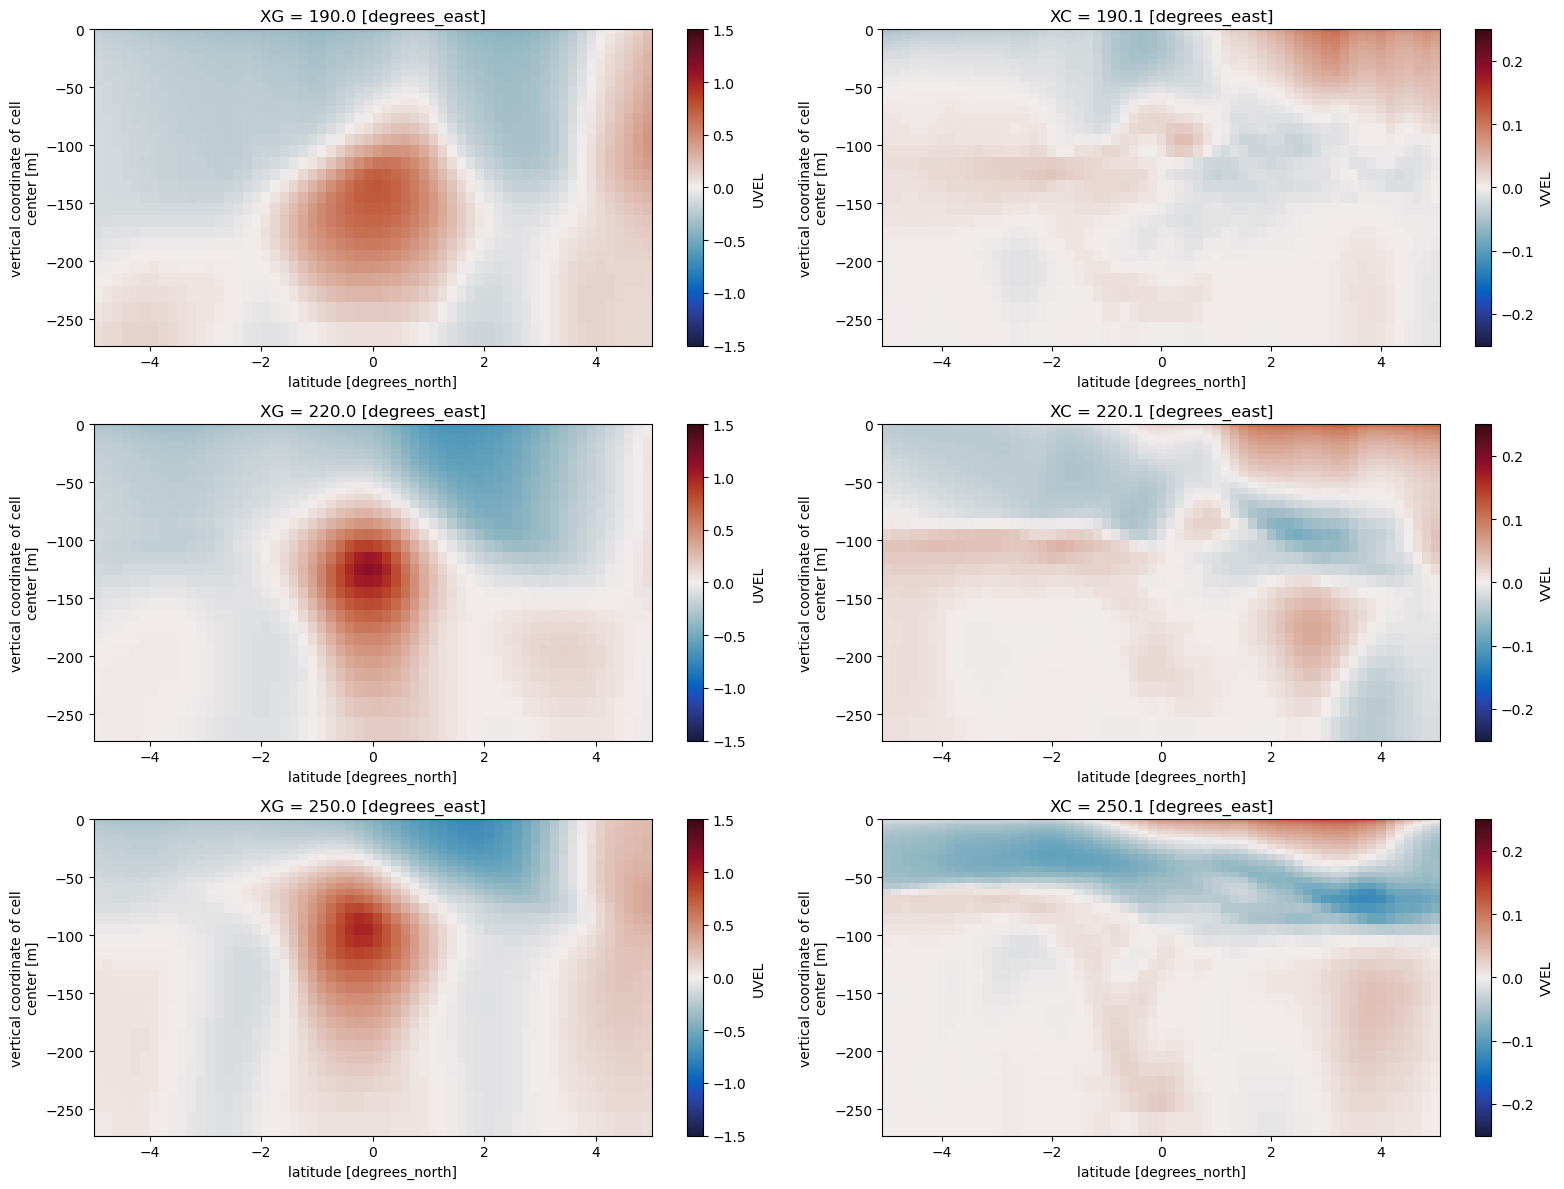

In [14]:
lats = tpose_ds.YC.values
lons = tpose_ds.XC.values
tpose_ds['XC'] = tpose_ds.XC.astype(float)
tpose_ds['YC'] = tpose_ds.YC.astype(float)
tpose_ds['Z'] = tpose_ds.Z.astype(float)
tpose_ds['XG'] = tpose_ds.XG.astype(float)
tpose_ds['YG'] = tpose_ds.YG.astype(float)

fig, ax = plt.subplots(3, 2, figsize=(16, 12))
tpose_ds.UVEL.sel(XG=[190.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[0,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(XG=[220.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[1,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(XG=[250.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[2,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)

tpose_ds.VVEL.sel(XC=[190.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[0,1], vmin=-0.25, vmax=0.25, cmap=cmo.balance)
tpose_ds.VVEL.sel(XC=[220.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[1,1], vmin=-0.25, vmax=0.25, cmap=cmo.balance)
tpose_ds.VVEL.sel(XC=[250.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[2,1], vmin=-0.25, vmax=0.25, cmap=cmo.balance)
plt.tight_layout()
plt.savefig('mean_meridional_transects_VEL.png')

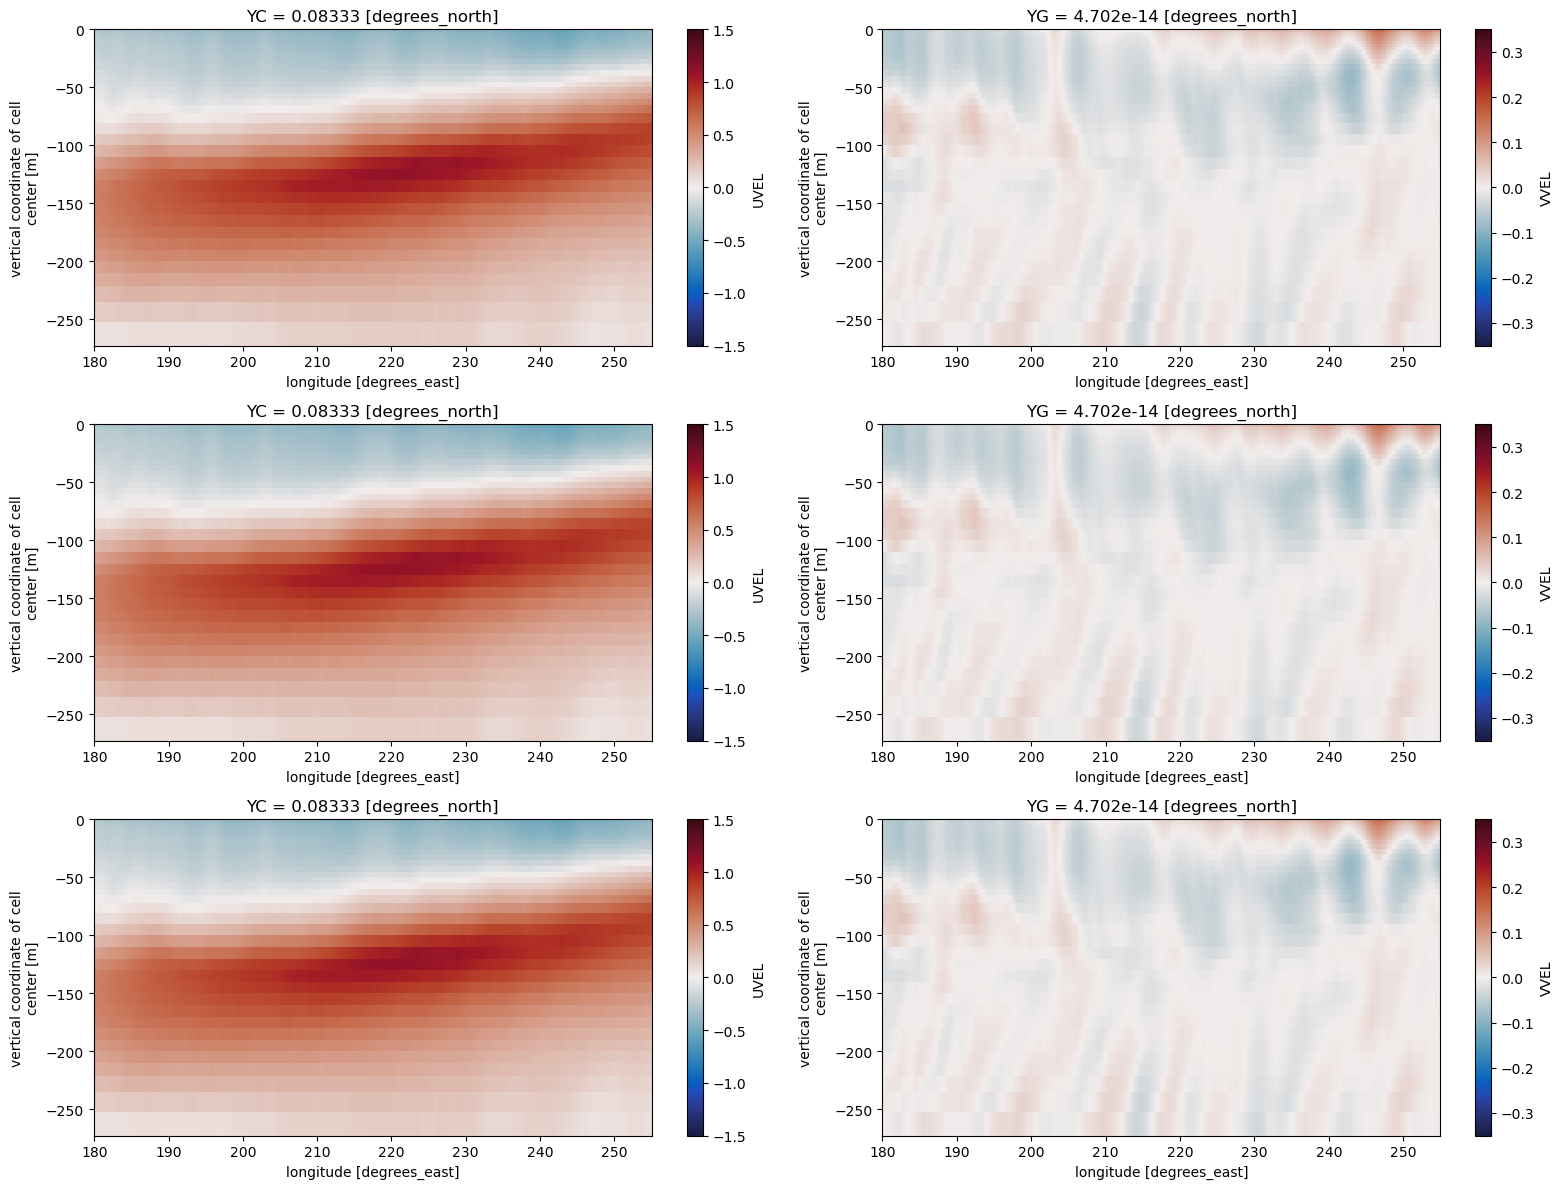

In [15]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[0,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[1,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[2,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)

tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[0,1], vmin=-0.35, vmax=0.35, cmap=cmo.balance)
tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[1,1], vmin=-0.35, vmax=0.35, cmap=cmo.balance)
tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).mean(dim='time').plot(ax=ax[2,1], vmin=-0.35, vmax=0.35, cmap=cmo.balance)
plt.tight_layout()
plt.savefig('mean_zonal_transects_VEL.png')

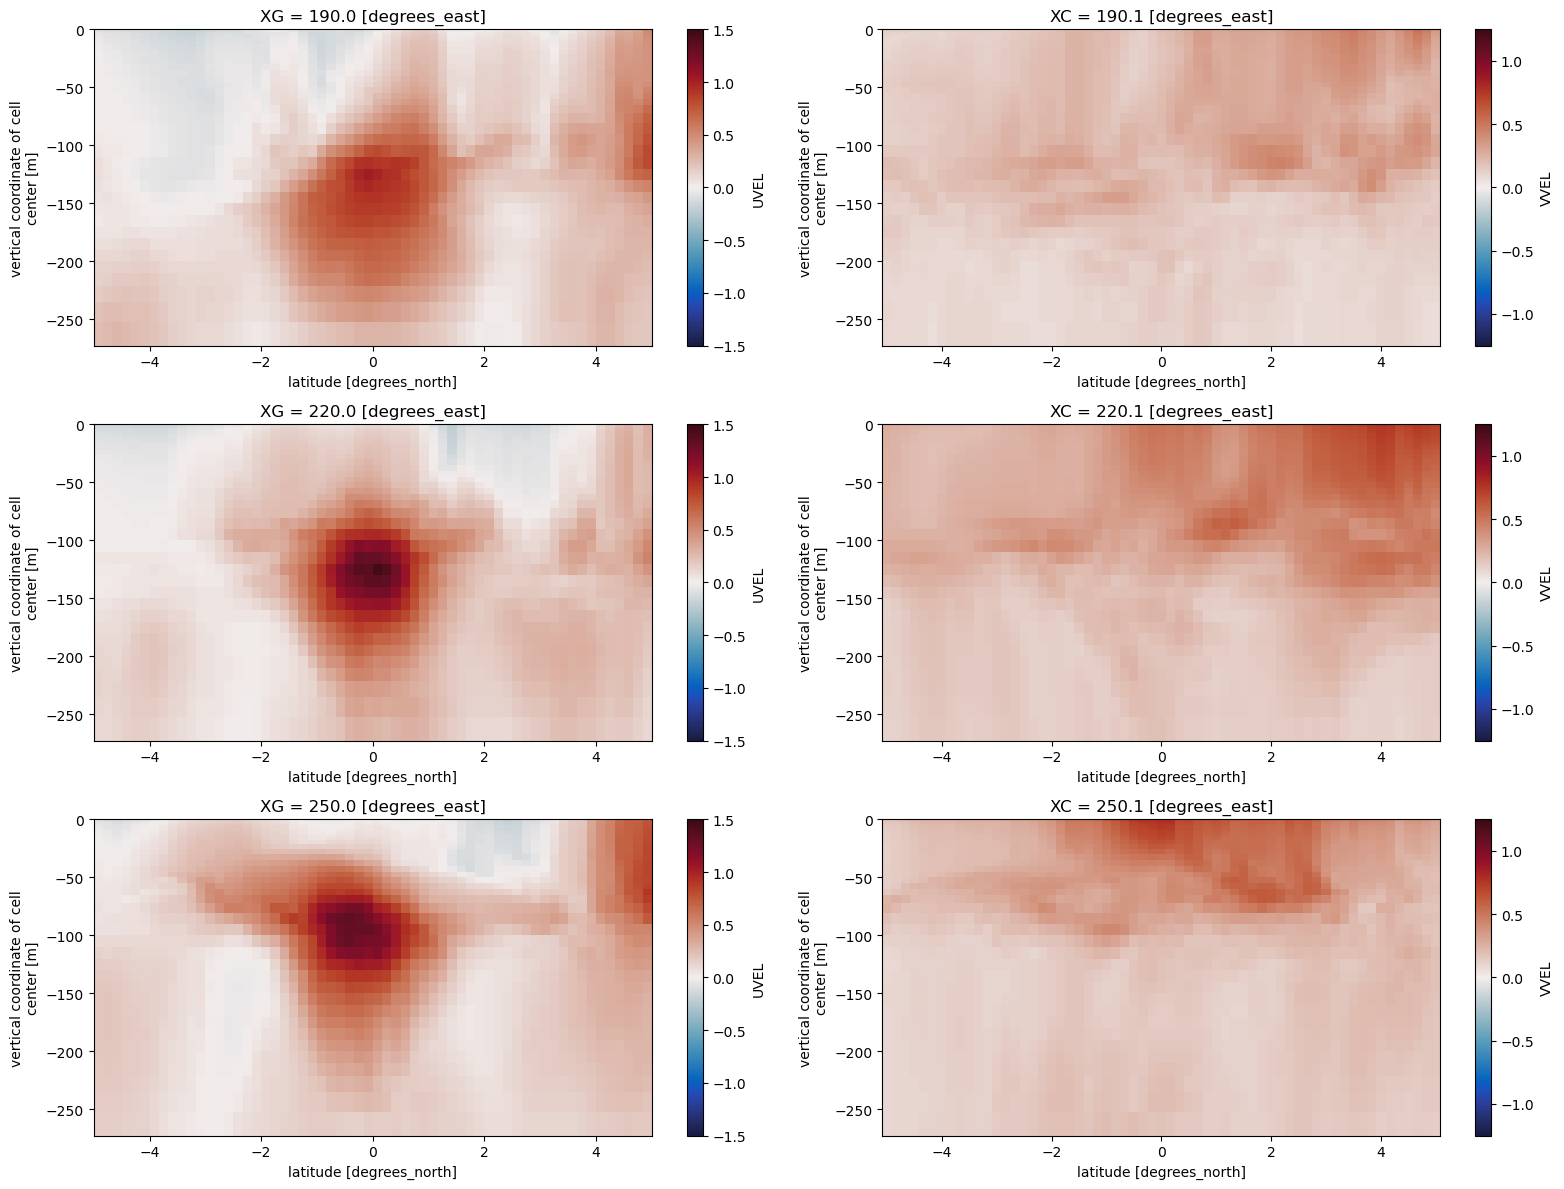

In [18]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
tpose_ds.UVEL.sel(XG=[190.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[0,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(XG=[220.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[1,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(XG=[250.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[2,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)

tpose_ds.VVEL.sel(XC=[190.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[0,1], vmin=-1.25, vmax=1.25, cmap=cmo.balance)
tpose_ds.VVEL.sel(XC=[220.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[1,1], vmin=-1.25, vmax=1.25, cmap=cmo.balance)
tpose_ds.VVEL.sel(XC=[250.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[2,1], vmin=-1.25, vmax=1.25, cmap=cmo.balance)
plt.tight_layout()
plt.savefig('max_meridional_transects_VEL.png')

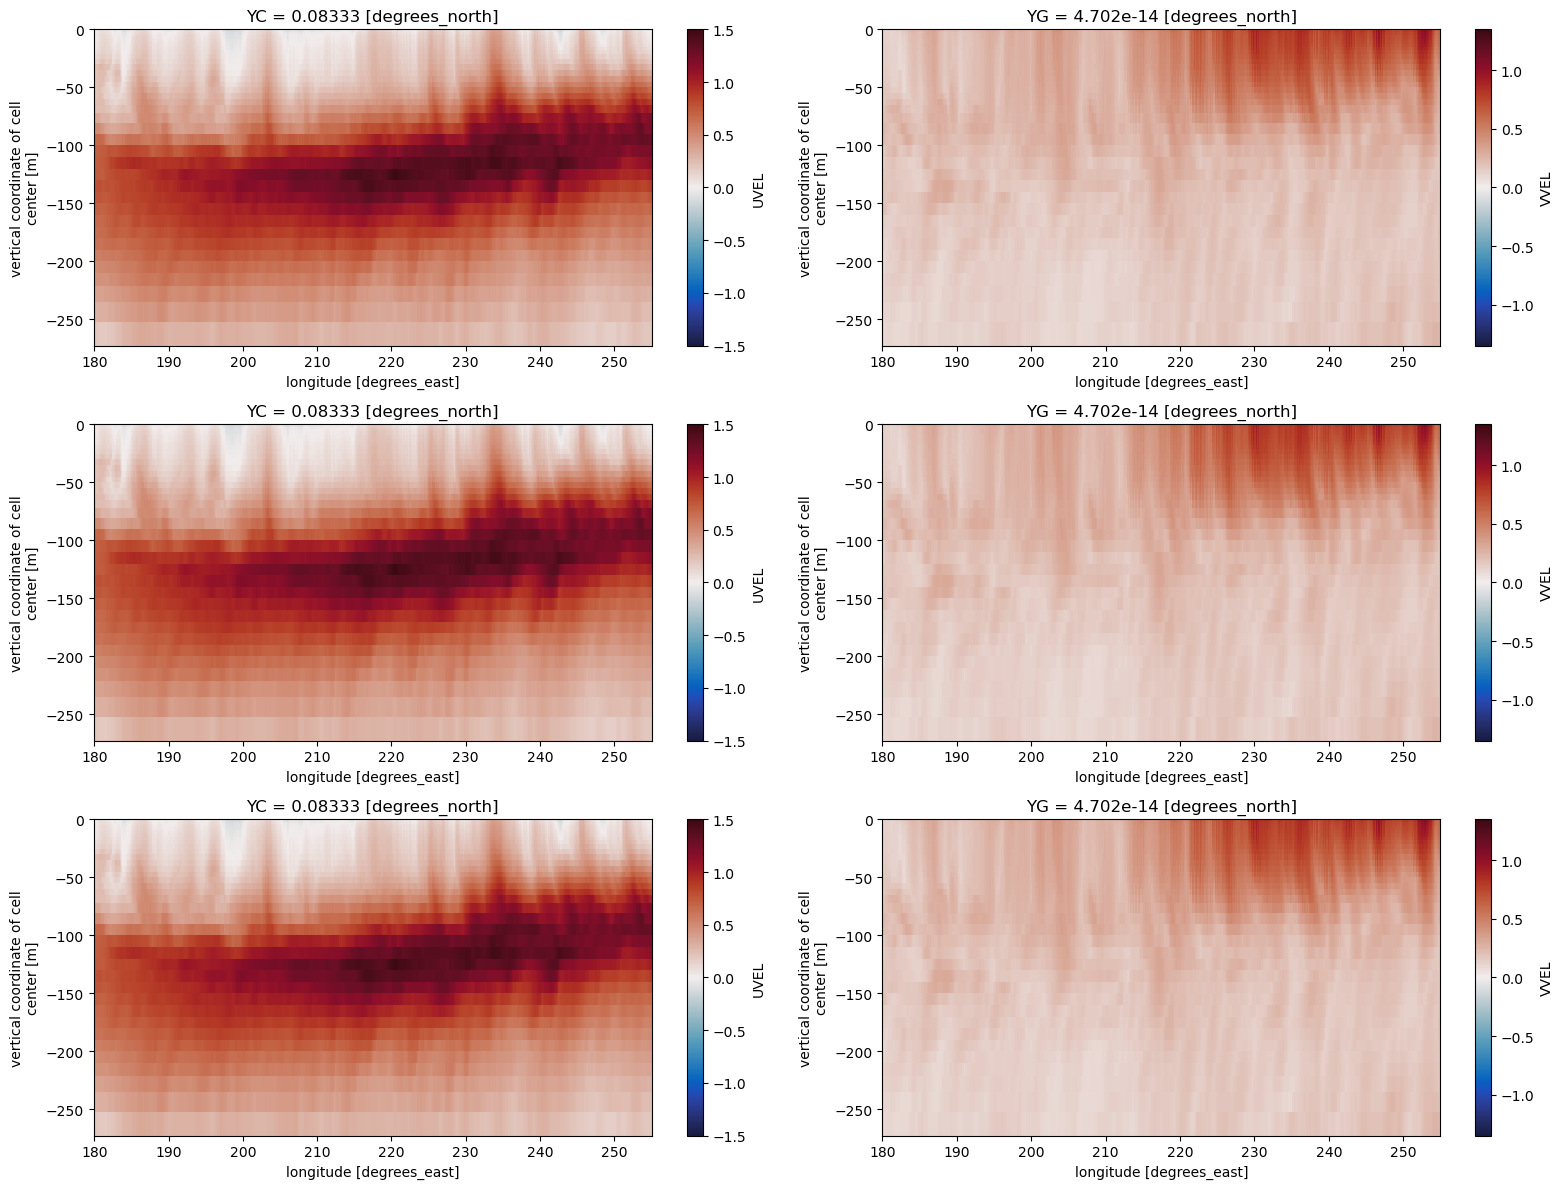

In [19]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[0,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[1,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[2,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)

tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[0,1], vmin=-1.35, vmax=1.35, cmap=cmo.balance)
tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[1,1], vmin=-1.35, vmax=1.35, cmap=cmo.balance)
tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).max(dim='time').plot(ax=ax[2,1], vmin=-1.35, vmax=1.35, cmap=cmo.balance)
plt.tight_layout()
plt.savefig('max_zonal_transects_VEL.png')

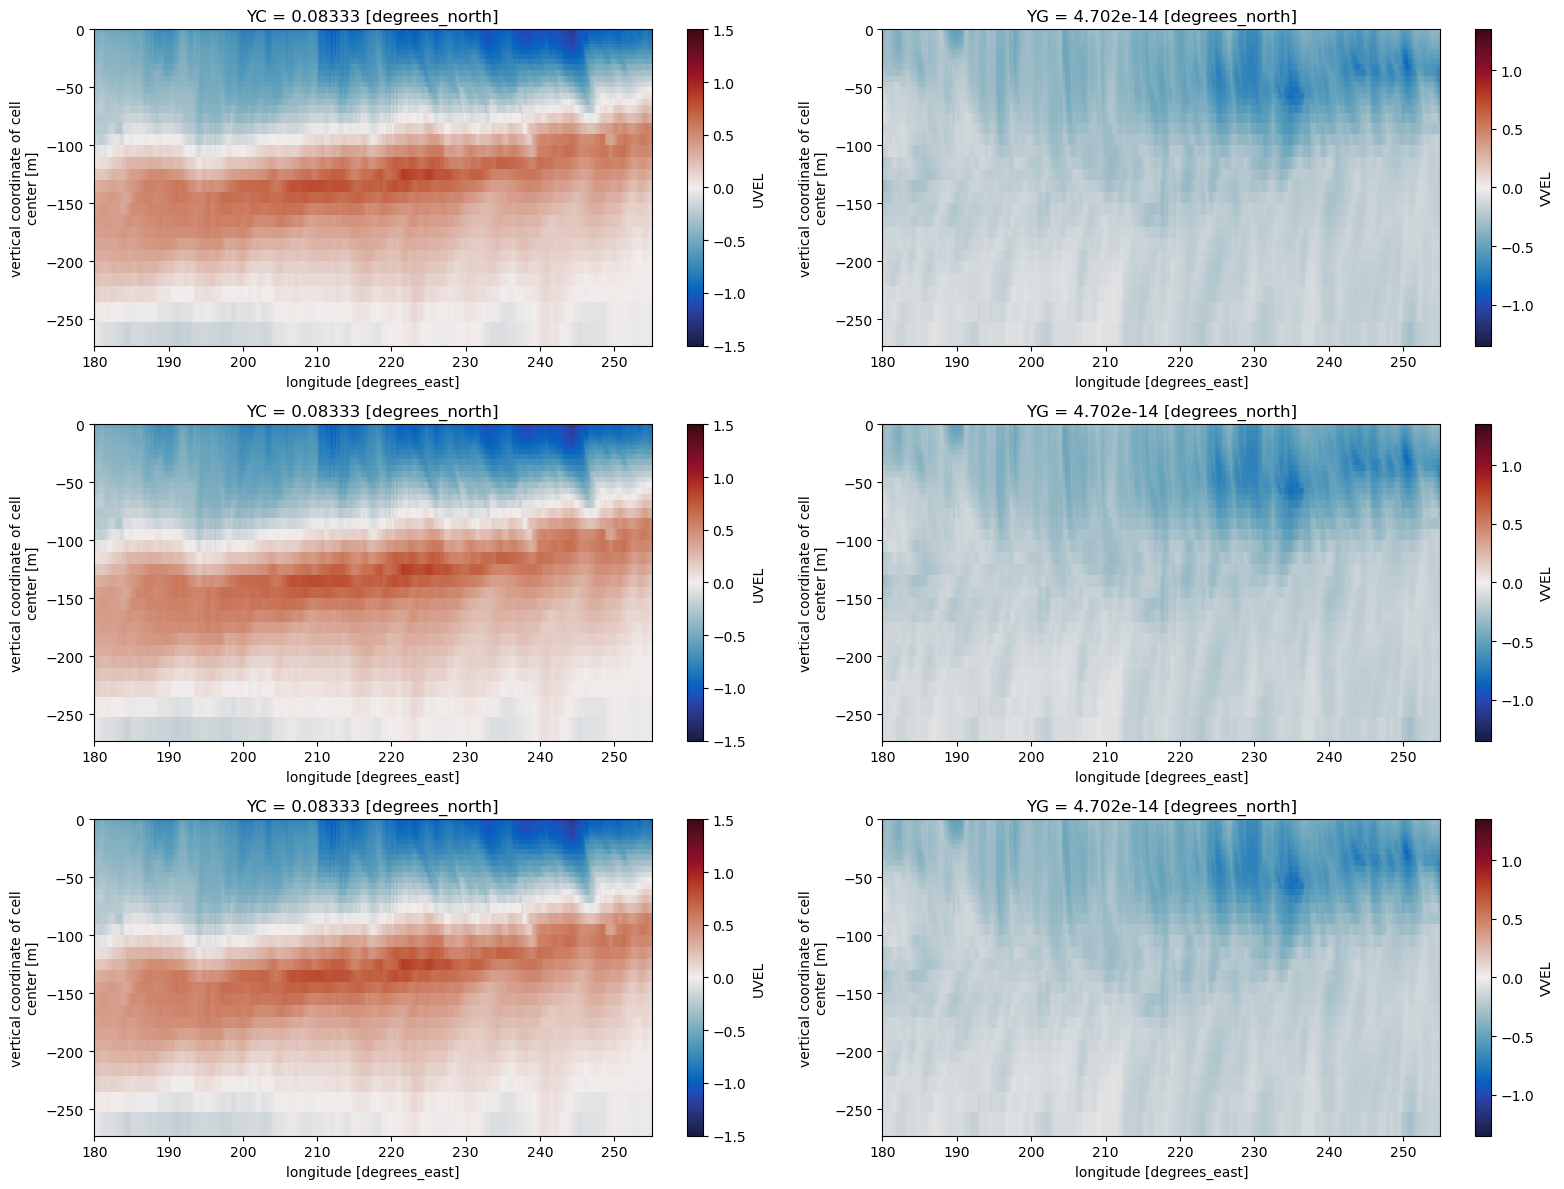

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[0,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[1,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(YC=[0.0],method='nearest').sel(XG=slice(180.0,255.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[2,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)

tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[0,1], vmin=-1.35, vmax=1.35, cmap=cmo.balance)
tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[1,1], vmin=-1.35, vmax=1.35, cmap=cmo.balance)
tpose_ds.VVEL.sel(YG=[0.0],method='nearest').sel(XC=slice(180.0,255.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[2,1], vmin=-1.35, vmax=1.35, cmap=cmo.balance)
plt.tight_layout()
plt.savefig('min_zonal_transects_VEL.png')

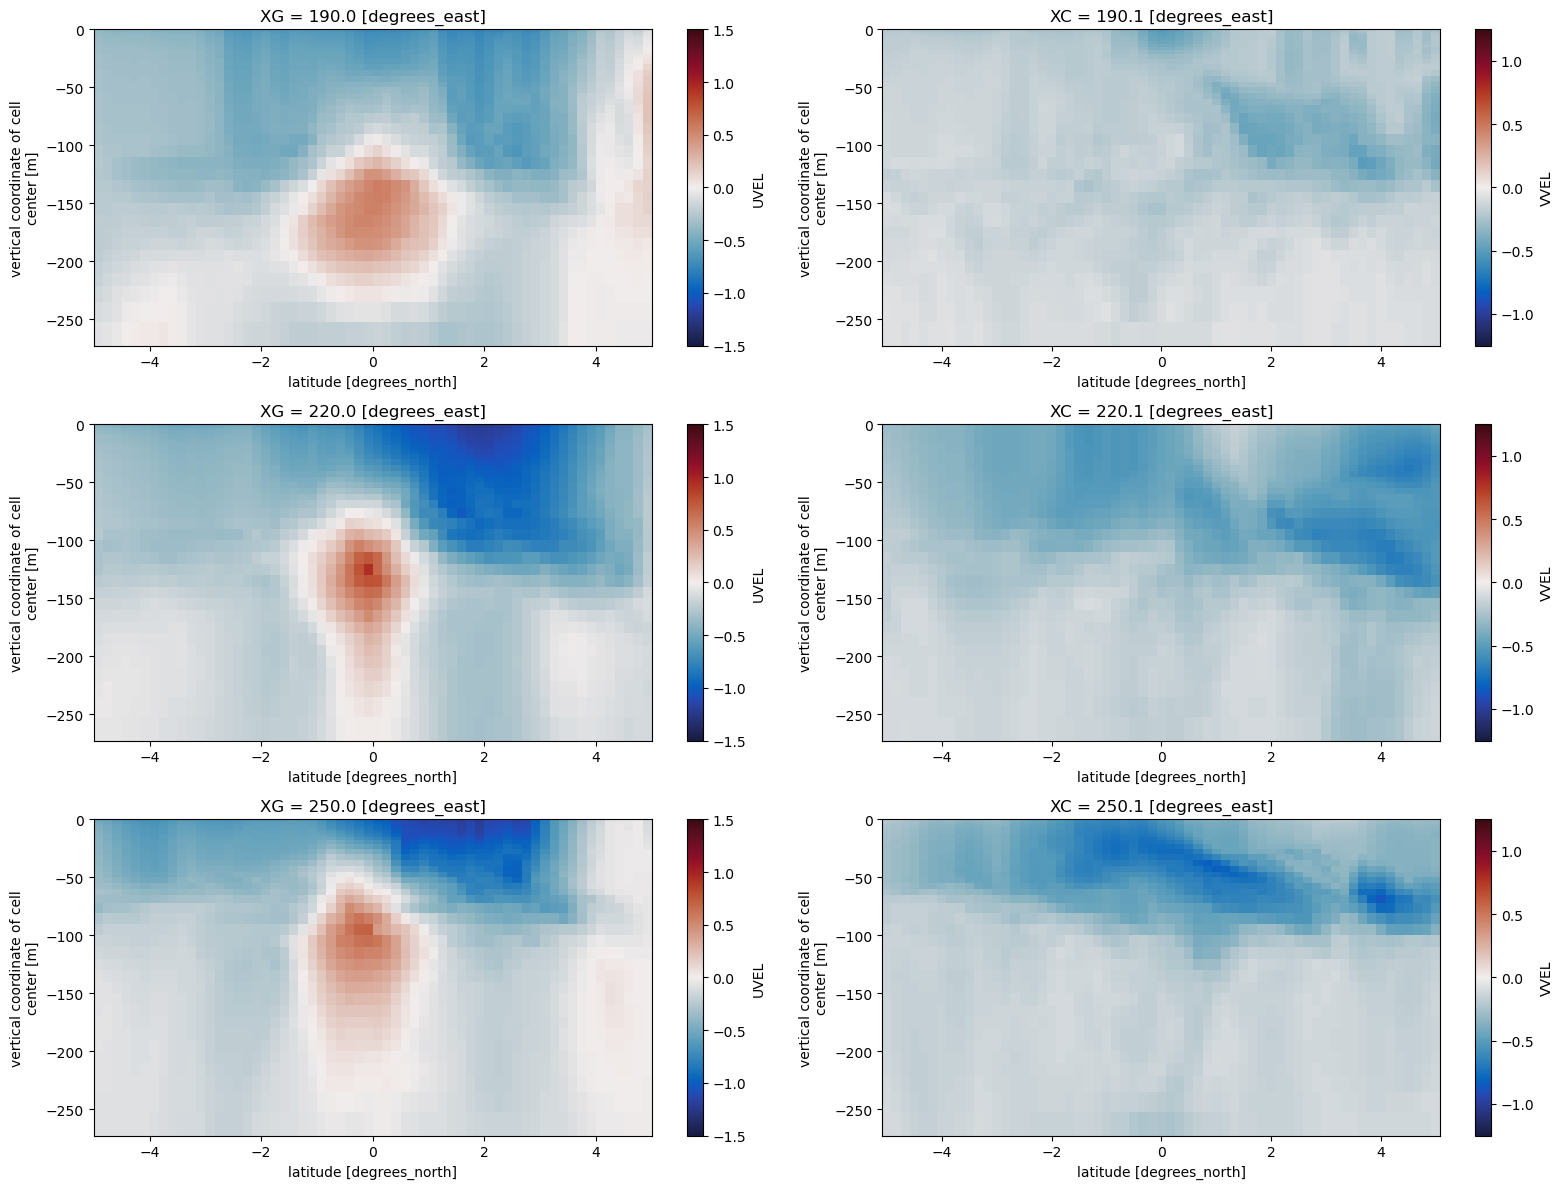

In [21]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
tpose_ds.UVEL.sel(XG=[190.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[0,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(XG=[220.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[1,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)
tpose_ds.UVEL.sel(XG=[250.0],method='nearest').sel(YC=slice(-5.0,5.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[2,0], vmin=-1.5, vmax=1.5, cmap=cmo.balance)

tpose_ds.VVEL.sel(XC=[190.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[0,1], vmin=-1.25, vmax=1.25, cmap=cmo.balance)
tpose_ds.VVEL.sel(XC=[220.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[1,1], vmin=-1.25, vmax=1.25, cmap=cmo.balance)
tpose_ds.VVEL.sel(XC=[250.0],method='nearest').sel(YG=slice(-5.0,5.0),Z=slice(0,-275)).min(dim='time').plot(ax=ax[2,1], vmin=-1.25, vmax=1.25, cmap=cmo.balance)
plt.tight_layout()
plt.savefig('min_meridional_transects_VEL.png')